<a href="https://colab.research.google.com/github/srijani-mitra/Python-ANN-Bank-Customer-Exit/blob/main/Bank_Customer_Exit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,ELU,LeakyReLU,PReLU
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [4]:
l = LabelEncoder()
df['Geography']=l.fit_transform(df['Geography'])
df['Gender']=l.fit_transform(df['Gender'])

In [5]:
x = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = df['Exited']

**Train-Test-Split**

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

**Artificial Neural Network [ANN]**

In [8]:
clf = Sequential()

In [9]:
clf.add(Dense(input_dim=10,units=10,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

clf.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model = clf.fit(xtrain,ytrain,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4473 - loss: 1.2837 - val_accuracy: 0.8019 - val_loss: 0.4921
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7228 - loss: 0.6039 - val_accuracy: 0.8037 - val_loss: 0.4790
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7609 - loss: 0.5774 - val_accuracy: 0.8019 - val_loss: 0.4716
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7823 - loss: 0.5333 - val_accuracy: 0.8019 - val_loss: 0.4685
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7915 - loss: 0.5188 - val_accuracy: 0.8000 - val_loss: 0.4649
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7837 - loss: 0.5254 - val_accuracy: 0.8000 - val_loss: 0.4636
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7943 - loss: 0.5053 - val_accuracy: 0.8006 - val_loss: 0.4614
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7948 - loss: 0.4919 - val_accu

In [30]:
yp = clf.predict(xtest)
yp = (yp>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
score = accuracy_score(yp,ytest)
print(score)

0.837


In [15]:
clf.save('Bank Customer Exit.h5')

In [16]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.0,1,1,1,101348.88,1


In [35]:
a = [[920,2,0,32,1,0,1,0,0,90000]]
a = np.array(a) # Convert to numpy array
a = sc.transform(a) # Scale the input using the fitted scaler
clf.predict(a).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0]])

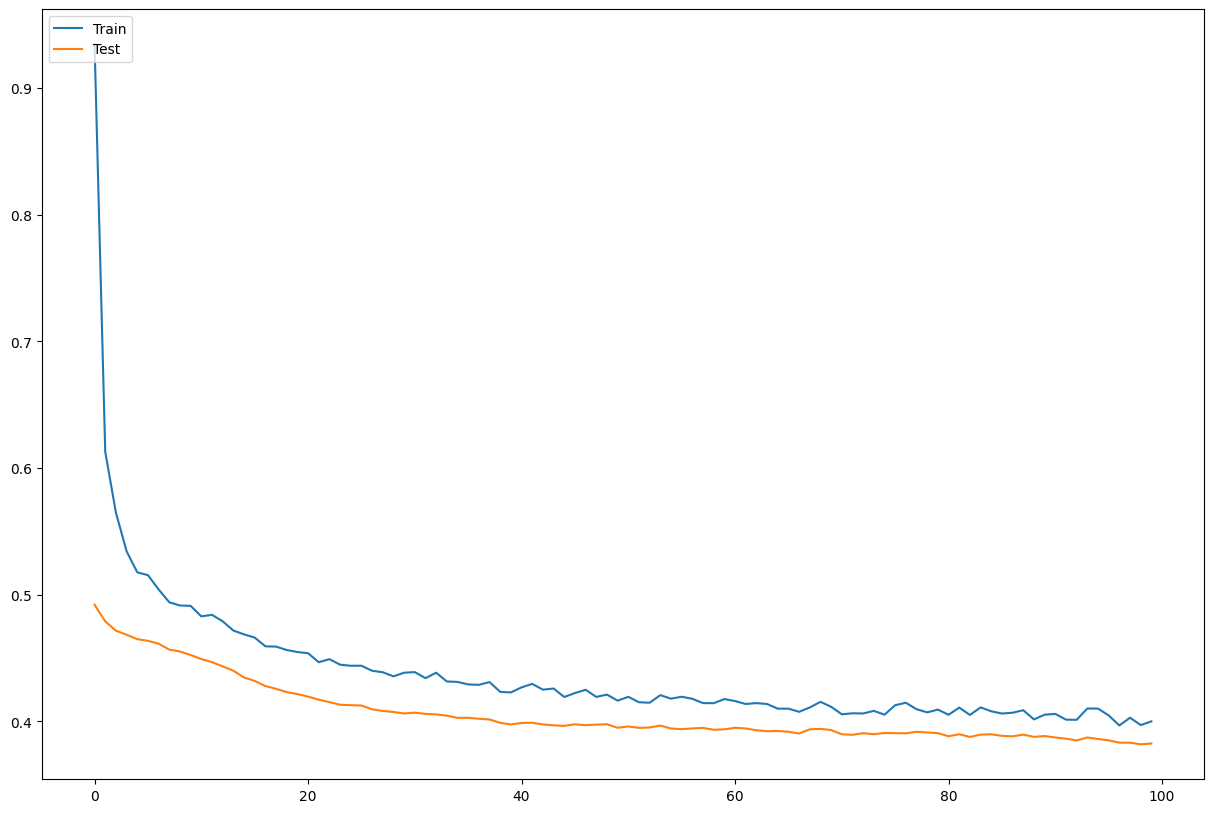

In [20]:
plt.figure(figsize=(15,10))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()

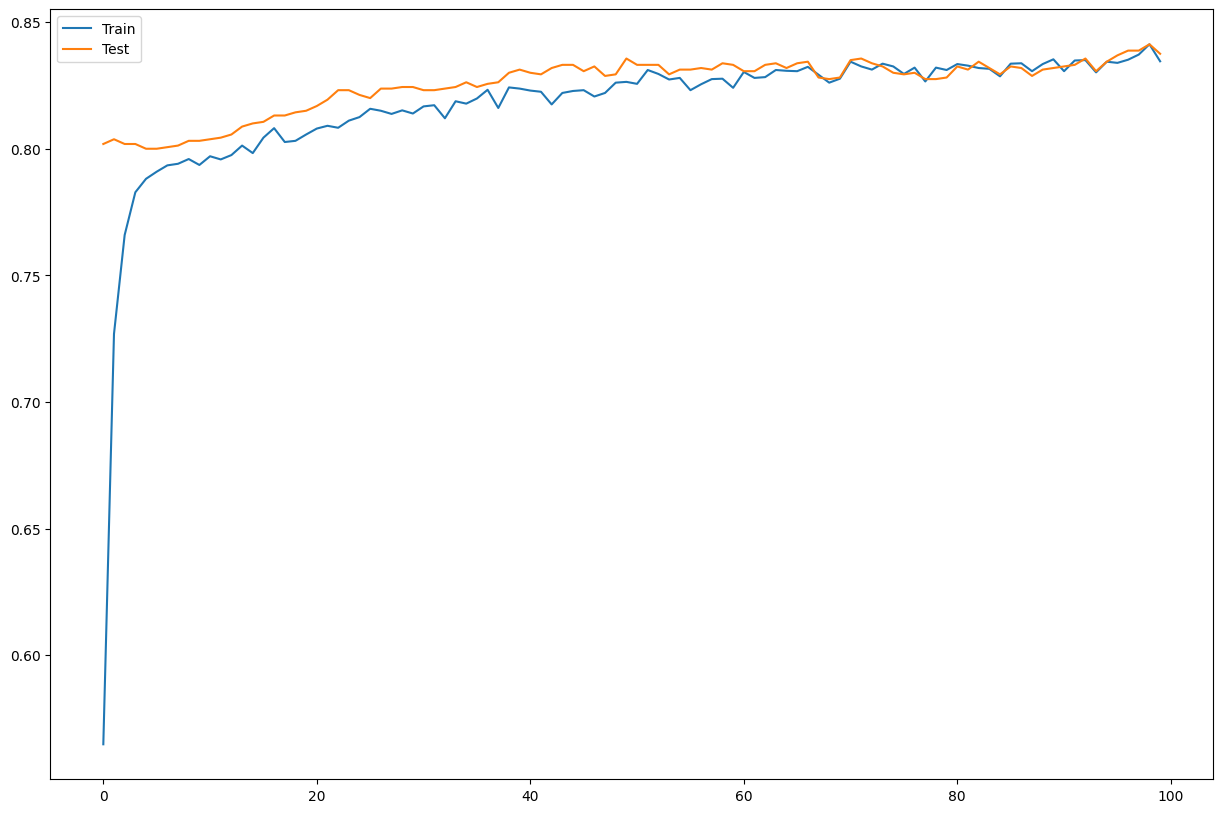

In [21]:
plt.figure(figsize=(15,10))
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [33]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.9 MB/s eta 0:00:00


In [37]:
%%writefile app.py
import keras
from keras.models import load_model

model = load_model('/content/Bank Customer Exit.h5')

import streamlit as st
a=[0,0,0,0,0,0,0,0,0,0]
credit = st.number_input('Credit Score')
geography = st.number_input('0: France, 1:Spain, 2:Germany')
gender = st.number_input('Gender 0 for female, 1 for male')
age = st.number_input('Age')
tenure = st.number_input('Tenure')
balance = st.number_input('Balance')
prod = st.number_input('Products')
card = st.number_input('Has Card')
act = st.number_input('Is Active')
salary = st.number_input('Salary')

a[0] = credit
a[1] = geography
a[2] = gender
a[3] = age
a[4] = tenure
a[5] = balance
a[6] = prod
a[7] = card
a[8] = act
a[9] = salary

output = model.predict([a])
st.write('Output', output)

Writing app.py


In [38]:
!streamlit run /content/app.py &>/content/logs.txt &

In [40]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://fast-dingos-watch.loca.lt
^C
